## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [33]:
import os
import keras
import warnings
warnings.filterwarnings('ignore')


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [34]:
train, test = keras.datasets.cifar10.load_data()

In [35]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [36]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [37]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [38]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]


In [42]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regualizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print('Experiment with Regulizer = %.6f' % (regualizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regualizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    exp_name_tag = "exp-l1-%s" % str(regualizer_ratio)
    
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}
    


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 6.0285 - acc: 0.2670 - val_loss: 5.8214 - val_acc: 0.3455
Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 5.7318 - acc: 0.3632 - val_loss: 5.6449 - val_acc: 0.3874
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 5.5794 - acc: 0.3931 - val_loss: 5.5132 - val_acc: 0.4043
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.4576 - acc: 0.4133 - val_loss: 5.4088 - val_acc: 0.4127
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.3479 - acc: 0.4317 - val_loss: 5.3023 - val_acc: 0.4313
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.2485 - acc: 0.4432 - val_loss: 5.2224 - val_acc: 0.4396
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.1559 - acc: 0.4549 - val_loss: 5.1237 - val_acc

50000/50000 [==============================] - 3s 68us/step - loss: 1.8094 - acc: 0.3687 - val_loss: 1.7648 - val_acc: 0.3889
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7220 - acc: 0.4007 - val_loss: 1.6898 - val_acc: 0.4051
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6612 - acc: 0.4186 - val_loss: 1.6370 - val_acc: 0.4287
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6155 - acc: 0.4353 - val_loss: 1.6006 - val_acc: 0.4368
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5775 - acc: 0.4492 - val_loss: 1.5698 - val_acc: 0.4482
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5440 - acc: 0.4589 - val_loss: 1.5619 - val_acc: 0.4459
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5141 - acc: 0.4701 - val_loss: 1.5189 - val_acc: 0.4649
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 66us/step - loss: 1.7132 - acc: 0.4001 - val_loss: 1.6840 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6533 - acc: 0.4223 - val_loss: 1.6308 - val_acc: 0.4222
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6043 - acc: 0.4373 - val_loss: 1.5922 - val_acc: 0.4409
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5671 - acc: 0.4514 - val_loss: 1.5661 - val_acc: 0.4475
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5324 - acc: 0.4620 - val_loss: 1.5429 - val_acc: 0.4548
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5045 - acc: 0.4719 - val_loss: 1.5174 - val_acc: 0.4597
Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.4766 - acc: 0.4833 - val_loss: 1.4960 - val_acc: 0.4700
Epoch 10/50
50000/50000 [===========================

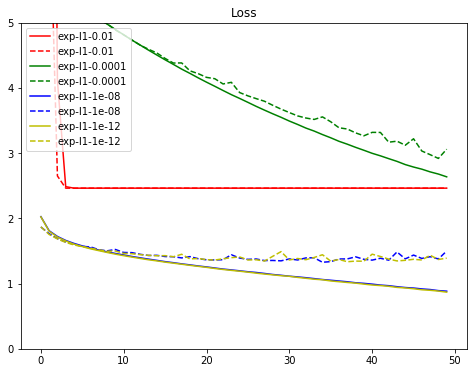

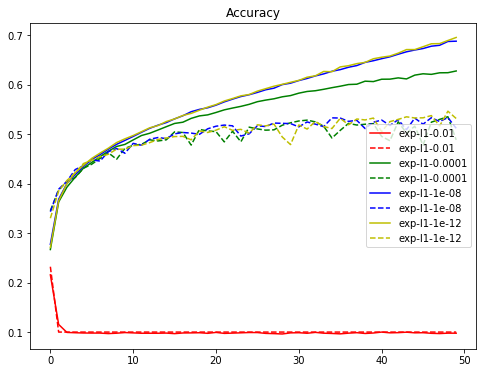

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


